# Linear Regression

#### TL; DR
To be able to quickly transcibe Linear Algebra/Math representation of statistical models into code for modeling purposes


### Gradient Descent

- Recall a line equation: $y=mx+b$
- Have to take the square error because absolute value at the minimum $\neq 0$

$$E=\sum_{i=1}^N (y_{i}-\hat{y_{i}})^2$$

such that $\frac{\partial{E}}{\partial{m}}=0$ and $\frac{\partial{B}}{\partial{b}}=0$

... bunch of derivative calculation in closed form...

$$m=\frac{\sum y_{i}x_{i}-\bar{y}\sum x_{i}}{\sum x_{i}^2-\bar{x}\sum x_{i}}$$

and 

$$b=\frac{\sum x_{i}^2-\bar{x}\sum y_{i}x_{i}}{\sum x_{i}^2-\bar{x}\sum x_{i}}$$

Hmmm... here is another more interpretable formulation:

$$m=\frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-\bar{x}^2}$$  

$$b=\frac{\bar{y}\bar{x^2}-\bar{x}\bar{xy}}{\bar{x^2}-\bar{x}^2}$$

where $\bar{x}=\frac{1}{N}\sum_{i=1}^N x_{i}$ and $\bar{xy}=\frac{1}{N}\sum_{i=1}^N x_{i}y_{i}$

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

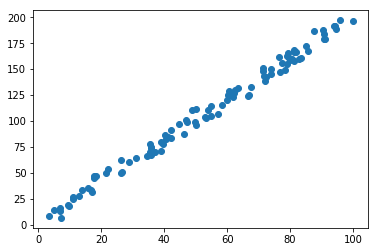

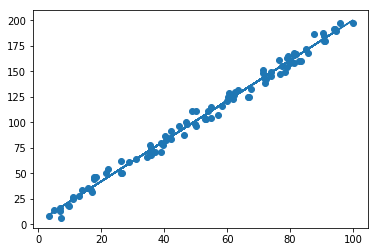

the r^2 is: 0.9911838202948865


In [19]:
# load the data
# X = []
# Y = []
# for line in open('./data/data_1d.csv'):
#     x, y = line.split(',')
#     X.append(float(x))
#     Y.append(float(y))

data = pd.read_csv('./data/data_1d.csv', header=None)

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(data.iloc[:,0])
Y = np.array(data.iloc[:,1])


# let's plot the data to see what it looks like
plt.scatter(X, Y)
plt.show()


# apply the equations we learned to calculate a and b

# denominator is common
# note: this could be more efficient if
#       we only computed the sums and means once
denominator = X.dot(X)-X.mean()*X.sum()
m = (X.dot(Y) - Y.mean()*X.sum()) / denominator
b = (Y.mean()*X.dot(X) - X.mean() *X.dot(Y)) / denominator

# let's calculate the predicted Y
Yhat = m*X + b

# let's plot everything together to make sure it worked
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()

RSS = 1 - d1.dot(d1) / d2.dot(d2)
print("the r^2 is: {}".format(RSS))

### R-Squared

- R-squared is the proportion of variance explained by x with values ideally between $0\geq r^{2}\geq 1$

$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

where 

$$SS_{res}=\sum_{i=1}^N (y_{i}-\hat{y_{i}})^2$$

and $$SS_{tot}=\sum_{i=1}^N (y_{i}-\bar{y_{i}})^2$$

When $R^2$ is negative then the intrepretation is that the model performs worse than just predicting the mean

## Multi-Linear Regression

Now our linear equation becomes 

$$\hat{y}=w^Tx+b$$

which is equivalent to $\hat{y}=w_{0}x_{0}+w_{1}x_{1}+...+w_{D}x_{D}=w'^{T}x'$

Recall our rules for maxtrix multiplication in terms of inner dimension matching.

$$\vec{y}_{Nx1}=X_{NxD}w_{Dx1}$$

### Derivation

The error function for multiple variables does not change just the $\hat{y}$ now becomes $w^T x_{i}$

$$E=\sum_{i=1}^N(y_{i}-w^T x_{i})^2$$

$$\frac{\partial{E}}{\partial{w_{j}}}$$ 

for $j=1...D$

so now we have:

$$\frac{\partial{E}}{\partial{w_{j}}}=\sum_{i=1}^N 2(y_{i}-w^T x_{i})(-x_{ij})$$

... vector calculus...

$$w=(X^TX)^{-1}X^Ty$$

or the numpythonic approach:

$$Ax=b\longrightarrow x=\text{np.linalg.solve}(A,b)$$

$$w=\text{np.linalg.solve}(X^T X ,X^Ty)$$

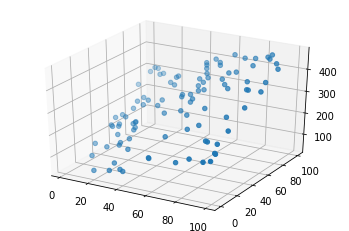

the r^2 is: 0.9975875695016861


In [50]:
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('./data/data_2d.csv', header=None)

# let's turn X and Y into numpy arrays since that will be useful later
X1 = np.array(data.iloc[:,0])
X2 = np.array(data.iloc[:,1])
X = np.column_stack((X1, X2, np.ones(len(X1))))

Y = np.array(data.iloc[:,2])


# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()


# apply the equations we learned to calculate a and b

# denominator is common
# note: this could be more efficient if
#       we only computed the sums and means once
w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()

RSS = 1 - d1.dot(d1) / d2.dot(d2)
print("the r^2 is: {}".format(RSS))

In [61]:
class LinearRegression():
    
    def fit(self, X, Y):
        self.w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
    
    def predict(self, X):
        self.yhat = np.dot(X, self.w)
        return self.yhat
    
    def r2_score(self, Y):
        SSR = Y - self.yhat
        SST = Y - Y.mean()
        self.r2 = 1 - (SSR.dot(SSR)/SST.dot(SST))
        return self.r2

In [62]:
test = LinearRegression()
test.fit(X, Y)
test.predict(X)
test.r2_score(Y)

0.9975875695016861

### Polynomial Regression

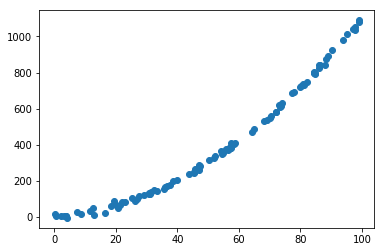

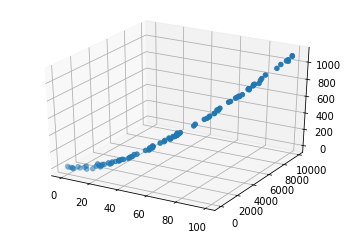

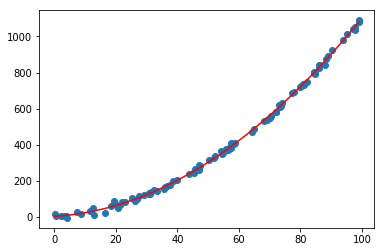

r^2 is: 0.9991370758972618


In [79]:
data = pd.read_csv('./data/data_poly.csv')

# let's turn X and Y into numpy arrays since that will be useful later
X1 = np.array(data.iloc[:,0])
X2 = np.array(data.iloc[:,0] * data.iloc[:,0])
X = np.column_stack((X1, X2, np.ones(len(X1))))

Y = np.array(data.iloc[:,1])
# let's plot the data to see what it looks like
plt.scatter(X[:,0], Y)
plt.show()

# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

# Finding the weights is the same as before with np.linalg.solve
w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

# let's plot the yhat
plt.scatter(X[:,0], Y)
plt.plot(sorted(X[:,0]), sorted(Yhat), color='r')
plt.show()

# R^2
SSR = Y - Yhat
SST = Y -Y.mean()
r2 = 1 - SSR.dot(SSR)/SST.dot(SST)
print(f'r^2 is: {r2}')
